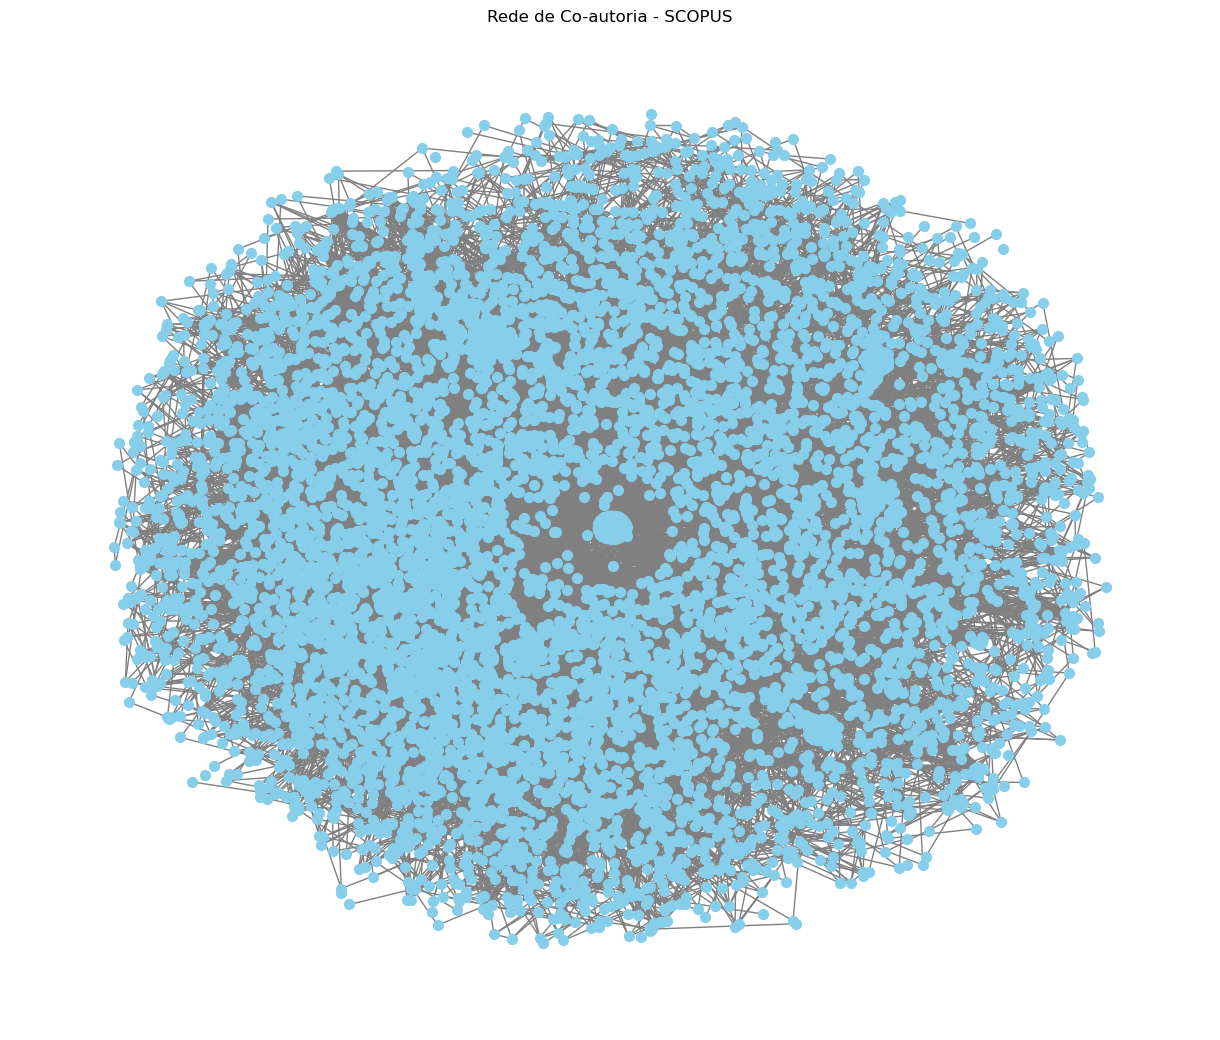

Número de nós: 9231
Número de arestas: 813074
Densidade da rede: 0.0191
Grau médio: 176.1616
Assortatividade: 0.9930
Agrupamento médio: 0.8630


In [17]:
!pip install networkx
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
#!pip install import_ipynp

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Criando funções auxiliares
def create_graph(dataframe):
    graph = nx.Graph()

    for index, row in dataframe.iterrows():
        autores = row["Authors"].split(";")
        for autor in autores:
            graph.add_node(autor)
    
        for i, autor1 in enumerate(autores):
            for j, autor2 in enumerate(autores):
                if j != i:
                    graph.add_edge(autor1, autor2)
        
    return graph

def plot_graph(graph, titulo, mode="spring"):
    plt.figure(figsize=(12, 10))
    
    if mode == "spring":
        pos = nx.spring_layout(graph, k=0.1)
    elif mode == "circular":
        pos = nx.circular_layout(graph)
    elif mode == "kamada":
        pos = nx.kamada_kawai_layout(graph)
    
    nx.draw(graph, pos, with_labels=False, node_size=50, node_color="skyblue", font_size=8, font_weight="bold", edge_color="gray", width=1, alpha=1)
    plt.title(titulo)
    plt.show()

def calculate_graph_metrics(G):
    metrics = {}
    metrics['num_nodes'] = G.number_of_nodes()
    metrics['num_edges'] = G.number_of_edges()
    metrics['average_degree'] = sum(dict(G.degree()).values()) / G.number_of_nodes()
    metrics['density'] = nx.density(G)
    metrics['assortativity'] = nx.degree_assortativity_coefficient(G)
    metrics['average_clustering'] = nx.average_clustering(G)
    return metrics

# Carregar o dataset correto (substitua o caminho pelo caminho correto do seu CSV)
df = pd.read_csv(r"C:\Users\gaby_\Downloads\scopus.csv")

# Criar o grafo a partir do dataset de co-autoria
graph = create_graph(df)

# Plotar o grafo utilizando o layout spring (padrão)
plot_graph(graph, titulo="Rede de Co-autoria - SCOPUS", mode="spring")

# Se você quiser experimentar outro layout, pode usar:
# plot_graph(graph, titulo="Rede de Co-autoria - SCOPUS", mode="circular")
# plot_graph(graph, titulo="Rede de Co-autoria - SCOPUS", mode="kamada")

# Calculando as métricas do grafo, incluindo a densidade
metrics = calculate_graph_metrics(graph)

# Exibindo as métricas, incluindo a densidade da rede
print(f"Número de nós: {metrics['num_nodes']}")
print(f"Número de arestas: {metrics['num_edges']}")
print(f"Densidade da rede: {metrics['density']:.4f}")
print(f"Grau médio: {metrics['average_degree']:.4f}")
print(f"Assortatividade: {metrics['assortativity']:.4f}")
print(f"Agrupamento médio: {metrics['average_clustering']:.4f}")


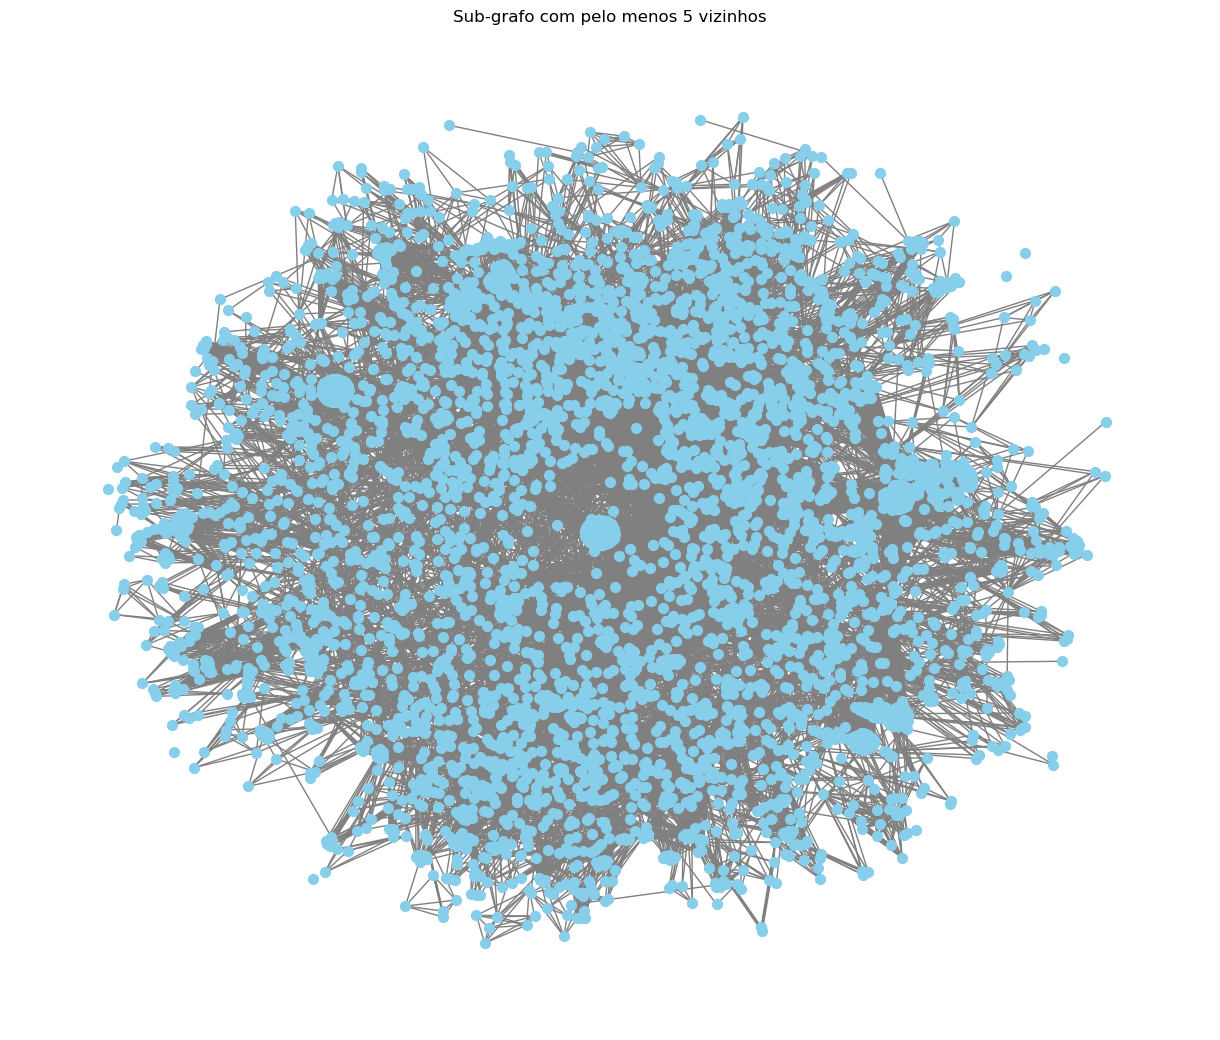

Densidade do sub-grafo com nós com pelo menos 5 vizinhos: 0.0437


In [18]:
def create_subgraph(graph, X):
    """
        Função para criar um sub-grafo contendo apenas os vértices que possuem
        pelo menos X vizinhos.

        args:
            - graph: grafo original
            - X: número mínimo de vizinhos para que um nó seja incluído no sub-grafo

        return:
            - subgraph: sub-grafo contendo apenas os nós com grau >= X
    """
    # Filtrando os nós que possuem pelo menos X vizinhos
    nodes_with_X_neighbors = [node for node, degree in dict(graph.degree()).items() if degree >= X]

    # Criando o sub-grafo com base nesses nós
    subgraph = graph.subgraph(nodes_with_X_neighbors)
    
    return subgraph

# Definir o valor de X (número mínimo de vizinhos)
X = 5  # Você pode definir o valor desejado

# Criar o sub-grafo contendo apenas os vértices com pelo menos X vizinhos
subgraph = create_subgraph(graph, X)

# Plotar o sub-grafo
plot_graph(subgraph, titulo=f"Sub-grafo com pelo menos {X} vizinhos", mode="spring")

# Calcular as métricas do sub-grafo, incluindo a densidade
subgraph_metrics = calculate_graph_metrics(subgraph)

# Exibir a densidade do sub-grafo
print(f"Densidade do sub-grafo com nós com pelo menos {X} vizinhos: {subgraph_metrics['density']:.4f}")


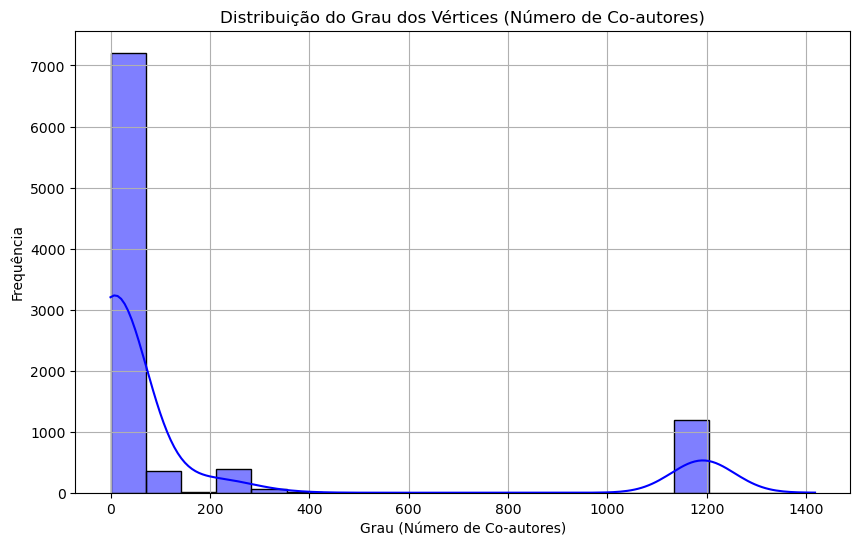

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_degree_histogram(graph, titulo):
    """
    Função para criar um histograma mostrando a distribuição de graus dos nós (autores) no grafo.
    
    args:
        - graph: grafo de co-autoria
        - titulo: título do gráfico
        
    return:
        - None
    """
    # Obtendo os graus (número de conexões) de cada nó
    degrees = [graph.degree(n) for n in graph.nodes()]
    
    # Verificando se a lista de graus não está vazia
    if not degrees:
        print("Nenhum grau encontrado. Verifique se o grafo foi criado corretamente.")
        return

    # Plotando o histograma usando seaborn
    plt.figure(figsize=(10, 6))
    sns.histplot(degrees, bins=20, kde=True, color="blue")
    plt.title(titulo)
    plt.xlabel('Grau (Número de Co-autores)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Criando o grafo (supondo que você já tenha carregado o dataframe `df`)
graph = create_graph(df)

# Plotando o histograma dos graus da rede
plot_degree_histogram(graph, "Distribuição do Grau dos Vértices (Número de Co-autores)")
